In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sqlalchemy import create_engine
import statsmodels.api as sm
from statsmodels.graphics.regressionplots import plot_partregress_grid
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [2]:
engine = create_engine("sqlite:///Data/team_database.db")

In [6]:
data = pd.read_sql("WIN_NUM_ROSTER_CHANGE_DATA", engine)

In [7]:
print(data.columns)

Index(['SEASON', 'TEAM_ID', 'TEAM_ABBREV', 'CHANGE_NUM_WINS', 'CHANGE_ROSTERS',
       'CHANGE_NET_RTG'],
      dtype='object')


In [11]:
model = sm.OLS(data['CHANGE_NUM_WINS'], sm.add_constant(data[['CHANGE_ROSTERS', 'CHANGE_NET_RTG']])).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        CHANGE_NUM_WINS   R-squared:                       0.760
Model:                            OLS   Adj. R-squared:                  0.759
Method:                 Least Squares   F-statistic:                     901.7
Date:                Wed, 10 Jan 2024   Prob (F-statistic):          2.79e-177
Time:                        22:51:02   Log-Likelihood:                -1729.3
No. Observations:                 573   AIC:                             3465.
Df Residuals:                     570   BIC:                             3478.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.9835      0.721      1.364      0.173      -0.433       2.400
CHANGE_ROSTERS    -1.4559      1.422     -1.024      0.306      -4.249       1.337
CHANGE_NET_RTG     2.1654      0.052     41.688      0.000       2.063       2.267
==============================================================================
Omnibus:                        5.962   Durbin-Watson:                   2.739
Prob(Omnibus):                  0.051   Jarque-Bera (JB):                7.135
Skew:                           0.119   Prob(JB):                       0.0282
Kurtosis:                       3.492   Cond. No.                         31.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

/Users/nehalchigurupati/miniconda3/lib/python3.11/site-packages/statsmodels/graphics/regressionplots.py:430: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  fig = abline_plot(0, fitted_line.params[0], color='k', ax=ax)
/Users/nehalchigurupati/miniconda3/lib/python3.11/site-packages/statsmodels/graphics/regressionplots.py:430: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  fig = abline_plot(0, fitted_line.params[0], color='k', ax=ax)
/Users/nehalchigurupati/miniconda3/lib/python3.11/site-packages/statsmodels/graphics/regressionplots.py:430: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a 

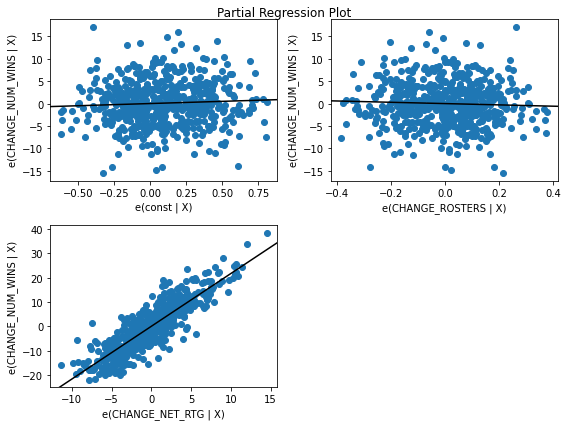

In [14]:
fig = plt.figure(figsize=(8, 6))
plot_partregress_grid(model, fig=fig)
plt.show()

In [16]:
df = sm.add_constant(data[['CHANGE_ROSTERS', 'CHANGE_NET_RTG']])

# Create a new DataFrame for the VIF results
vif_data = pd.DataFrame()
vif_data["Feature"] = df.columns

# Calculate VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]
print(vif_data)

          Feature        VIF
0           const  12.111456
1  CHANGE_ROSTERS   1.028618
2  CHANGE_NET_RTG   1.028618
